In [40]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt


In [41]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Dataset Path and Data Augmentation

In [42]:

dataset_path = '/content/drive/MyDrive/ML_Autumn_2024/ML PROJECT/Dataset'

# Image size and parameters
img_width, img_height = 128, 128
batch_size = 32

# Data Augmentation
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

# Training
train_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

validation_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)


Found 320 images belonging to 4 classes.
Found 80 images belonging to 4 classes.


**Build the CNN Model**

In [44]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(train_generator.num_classes, activation='softmax')  # Number of classes
])


model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)                                 # Compiled the model

# Displayed the model summary
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │       3,211,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 4)                   │             516 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,305,156 (12.61 MB)

 Trainable params: 3,305,156 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

**Train the model**

In [46]:

epochs = 10
history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=validation_generator
)


Epoch 1/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 35s 3s/step - accuracy: 0.8203 - loss: 0.4785 - val_accuracy: 0.6750 - val_loss: 0.9790
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 27s 2s/step - accuracy: 0.8146 - loss: 0.4695 - val_accuracy: 0.6875 - val_loss: 0.8889
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 26s 2s/step - accuracy: 0.8877 - loss: 0.4031 - val_accuracy: 0.6375 - val_loss: 1.0538
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 42s 2s/step - accuracy: 0.8549 - loss: 0.3647 - val_accuracy: 0.6500 - val_loss: 1.1028
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 42s 2s/step - accuracy: 0.9244 - loss: 0.2519 - val_accuracy: 0.6750 - val_loss: 1.4916
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 47s 2s/step - accuracy: 0.9155 - loss: 0.1926 - val_accuracy: 0.6500 - val_loss: 1.5130
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 29s 2s/step - accuracy: 0.9526 - loss: 0.1620 - val_accuracy: 0.6500 - val_loss: 1.3914
Epoch 8/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 36s 2s/step - accuracy: 0.9465 - loss: 0.1770 - val_accuracy: 0.6500 - val_loss:

In [48]:
# Evaluate the model
validation_loss, validation_accuracy = model.evaluate(validation_generator)
print(f"Validation Accuracy: {validation_accuracy:.2f}")

# Classification Report
y_pred = np.argmax(model.predict(validation_generator), axis=1)
y_true = validation_generator.classes
class_labels = list(validation_generator.class_indices.keys())

print("\nClassification Report:\n")
print(classification_report(y_true, y_pred, target_names=class_labels))


3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 2s/step - accuracy: 0.6508 - loss: 1.7707
Validation Accuracy: 0.64
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step

Classification Report:

              precision    recall  f1-score   support

         Bus       0.39      0.45      0.42        20
         Car       0.41      0.35      0.38        20
       Truck       0.18      0.10      0.13        20
  motorcycle       0.28      0.40      0.33        20

    accuracy                           0.33        80
   macro avg       0.32      0.33      0.31        80
weighted avg       0.32      0.33      0.31        80



**Confusion Matrix**

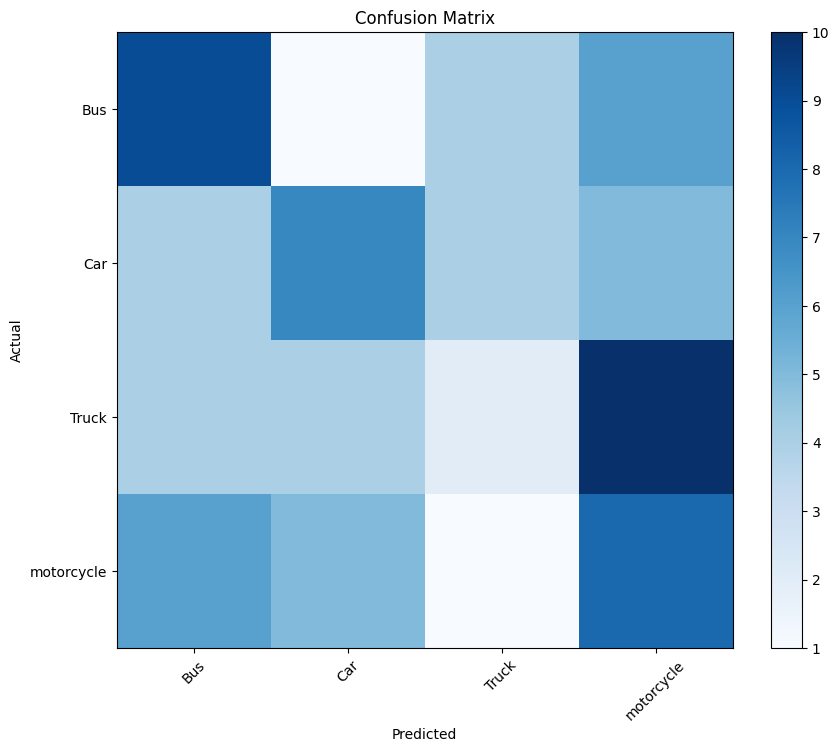

In [49]:
conf_matrix = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(10, 8))
plt.imshow(conf_matrix, cmap='Blues')
plt.title("Confusion Matrix")
plt.colorbar()
plt.xticks(ticks=np.arange(len(class_labels)), labels=class_labels, rotation=45)
plt.yticks(ticks=np.arange(len(class_labels)), labels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [50]:
model.save('/content/drive/MyDrive/ML_Autumn_2024/ML PROJECT/Dataset/vehicle_classification_model.h5')
print("Model saved as 'vehicle_classification_model.h5' in your Google Drive")


Model saved as 'vehicle_classification_model.h5' in your Google Drive


In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt




In [51]:
model_path = '/content/drive/MyDrive/ML_Autumn_2024/ML PROJECT/Dataset/vehicle_classification_model.h5'
model = tf.keras.models.load_model(model_path)

#
class_labels = {0: 'Bus', 1: 'Car', 2: 'Motorcycle', 3: 'Truck'}

In [52]:
def classify_vehicle_image(image_path, model, class_labels, img_width=128, img_height=128):
    """
    Classify a vehicle image using a trained CNN model.

    Parameters:
        image_path (str): Path to the image file.
        model (tf.keras.Model): The trained CNN model.
        class_labels (dict): Dictionary mapping class indices to vehicle types.
        img_width (int): Target width for resizing the image.
        img_height (int): Target height for resizing the image.

    Returns:
        None: Displays the image and predicted class.
    """
    try:

        img = load_img(image_path, target_size=(img_width, img_height)) # Load and preprocess the image
        img_array = img_to_array(img) / 255.0
        img_array = np.expand_dims(img_array, axis=0)


        predictions = model.predict(img_array)
        predicted_class = np.argmax(predictions, axis=1)[0]
        confidence = predictions[0][predicted_class]


        plt.imshow(img)
        plt.title(f"Prediction: {class_labels[predicted_class]} (Confidence: {confidence:.2f})")
        plt.axis('off')
        plt.show()
    except Exception as e:
        print(f"Error processing the image: {e}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step


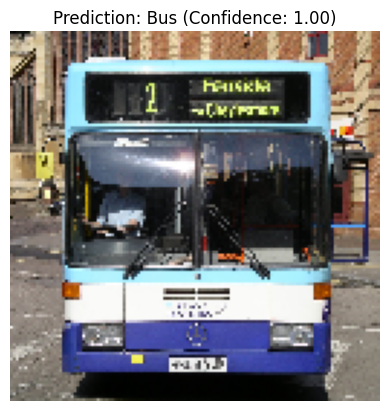

In [54]:
test_image_path = '/content/drive/MyDrive/ML_Autumn_2024/ML PROJECT/Dataset/Bus/Image_100.jpg'

classify_vehicle_image(test_image_path, model, class_labels)
